## Propuesta de Evaluadores

In [11]:
from joblib import load, dump 
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import seaborn as sns
import numpy as np

### Topicos por evaluador

In [12]:
topicos_evaluador = load('../../trained_models/archivos/topicos_por_evaluador.pkl')
topicos_evaluador.reset_index(drop=False,inplace=True)
evaluadores_entreanado = topicos_evaluador["CVU"].tolist()
#  rcea_entreanado = topicos_evaluador["CVU"].tolist()
topicos_evaluador.head(5)

,CVU,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
0,32,1.039730e-11,0.022571,0.024007,0.000000e+00,3.344736e-13,5.946791e-01,0.045747,0.007538,0.000234,...,0.003466,0.000000e+00,0.015221,6.372822e-11,0.101933,0.000000,5.356554e-01,0.000000,0.000000e+00,0.000000e+00
1,62,3.316664e-06,0.033592,0.075867,2.268785e-15,1.231933e-13,2.130934e-05,0.070647,0.035292,0.009585,...,0.015404,1.614905e-14,0.013444,2.346778e-11,0.025559,0.037891,3.676195e-02,0.000000,5.257031e-18,5.586499e-02
2,69,1.383044e-01,0.125887,0.115679,3.138819e-02,3.081193e-03,3.188412e-02,0.085819,0.042314,0.031455,...,0.069906,6.562758e-02,0.102238,6.494592e-02,0.098280,0.045843,6.188742e-02,0.033367,9.932581e-02,6.823725e-01
3,92,1.095244e-05,0.039850,0.032008,0.000000e+00,7.967706e-17,1.572656e-08,0.037290,0.011857,0.045701,...,0.031606,2.439729e-14,0.004882,0.000000e+00,0.020260,0.011168,1.085635e-01,0.000000,1.736001e-17,3.050502e-12
4,112,1.199364e-05,0.089996,0.024074,1.300955e-01,1.485544e-13,2.569760e-05,0.067111,0.008156,0.015631,...,0.044469,4.672058e-14,0.024951,2.828788e-11,0.009978,0.119817,2.977220e-08,0.000000,2.744523e-01,3.340501e-12


In [13]:
topicos_evaluador["CVU"].nunique()

489

## Topicos por propuesta

In [14]:
topicos_texto = load("../../trained_models/archivos/topicos_por_texto_train.pkl")
topicos_texto.drop_duplicates("ID_PROYECTO", inplace=True)
id_proyecto_index = topicos_texto["ID_PROYECTO"].tolist()
topicos_texto.head(2)

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,ID_PROYECTO
26684,2.162930e-01,0.061640,0.065430,0.000000e+00,0.0,0.199193,0.090115,0.204934,0.000000e+00,0.018401,...,6.436994e-15,0.045546,0.000000,0.030017,0.060498,0.119627,0.000000,0.0,0.101640,202637
23823,3.212326e-13,0.074174,0.016766,1.142082e-15,0.0,0.440904,0.048277,0.031629,4.306999e-13,0.003143,...,2.839865e-02,0.047902,0.028104,0.015734,0.060558,0.016549,0.231023,0.0,0.056244,5724


In [15]:
topicos_texto.shape

(493, 501)

### cosine similarity

In [16]:
cos_simi = cosine_similarity(topicos_evaluador.iloc[:,1:], topicos_texto.iloc[:,:-1])

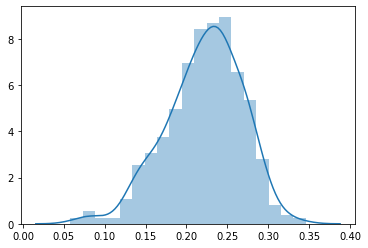

In [17]:
df_cos_simi = pd.DataFrame(cos_simi)
sns.distplot(df_cos_simi.mean(axis=0))

## encontrar top 5 evaluadores

In [18]:
numero_sugeridos = 3

encontramos elpercentil 97 por fila

In [19]:
df_evaluadores_recomendados = pd.DataFrame(index=[i for i in range(len(id_proyecto_index*numero_sugeridos))]
                                           ,columns=["id_proyecto","CVU","score_tm"])
df_evaluadores_recomendados.head()                                

,id_proyecto,CVU,score_tm
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [20]:
def normalize(lista, to_sum=False, copy=True):
    # d is a (n x dimension) np array
    lista_max = np.max(lista, axis=0)
    lista = [elemento/lista_max for elemento in lista ]
    return lista

In [21]:
cvu_evaluadores_lista = []
score_evaluadores_lista = []
id_proyecto_lista = []

for proyecto in range(df_cos_simi.shape[1]):
    
    list_each_proyecto = df_cos_simi.iloc[:,proyecto].tolist()
    
    top_5_idx = np.argsort(list_each_proyecto)[-numero_sugeridos:][::-1].tolist()
    
    [cvu_evaluadores_lista.append(evaluadores_entreanado[pos]) for pos in top_5_idx] 
    
    # normalized_score = normalize([df_cos_simi.iloc[pos,proyecto] for pos in top_5_idx])
    [score_evaluadores_lista.append(df_cos_simi.iloc[pos,proyecto]) for pos in top_5_idx]
    [id_proyecto_lista.append(id_proyecto_index[proyecto]) for i in range(numero_sugeridos)]


In [22]:
df_evaluadores_recomendados["id_proyecto"] = id_proyecto_lista
df_evaluadores_recomendados["CVU"] = cvu_evaluadores_lista
df_evaluadores_recomendados["score_tm"] = score_evaluadores_lista

In [23]:
df_evaluadores_recomendados.iloc[0:10,:]

,id_proyecto,CVU,score_tm
0,202637,163056,1.000000
1,202637,84933,0.517875
2,202637,5617,0.482556
3,5724,21465,1.000000
4,5724,5285,0.517069
5,5724,14518,0.494904
6,215598,74240,1.000000
7,215598,120739,0.575777
8,215598,1132,0.548406
9,29820,15732,1.000000


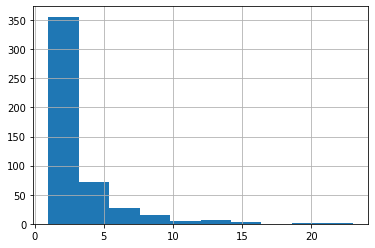

In [24]:
df_evaluadores_recomendados["CVU"].value_counts().hist()

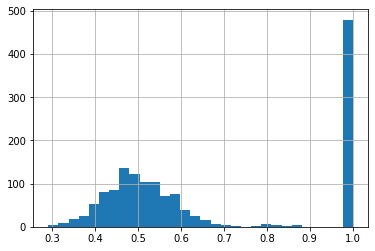

In [25]:
df_evaluadores_recomendados["score_tm"].hist(bins=30)

In [33]:
dump( df_evaluadores_recomendados, "./propuesta_evaluadores_sample.pkl")

['./propuesta_evaluadores_sample.pkl']

___

In [34]:
df_evaluadores_recomendados_1 = load("./propuesta_evaluadores.pkl")

In [35]:
id_proyectos = df_evaluadores_recomendados_1["id_proyecto"].unique().tolist()

In [36]:
proyecto = 2455

In [37]:
df_evaluadores_recomendados_1[df_evaluadores_recomendados_1["id_proyecto"]==id_proyectos[proyecto]].head(5)

,id_proyecto,CVU,score_tm
49100,74869,25369,0.675206
49101,74869,31033,0.662452
49102,74869,33636,0.653645
49103,74869,209974,0.651359
49104,74869,101660,0.646202


In [38]:
df_evaluadores_recomendados.sort_values("score_tm", ascending=False, inplace=True)

In [39]:
df_evaluadores_recomendados[df_evaluadores_recomendados["id_proyecto"]==id_proyectos[proyecto]].head(10)

,id_proyecto,CVU,score_tm
